In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('out.csv')

In [4]:
df.head()

,x,y,z
0,NaN,0.29,0.33
1,1.19,0.29,0.33
2,1.48,0.52,0.62
3,1.48,0.52,0.62
4,1.48,0.71,0.67


In [6]:
df = df.drop(0)

In [7]:
df.head()

,x,y,z
1,1.19,0.29,0.33
2,1.48,0.52,0.62
3,1.48,0.52,0.62
4,1.48,0.71,0.67
5,1.43,1.10,1.43


In [8]:
import matplotlib.pyplot as plt

In [9]:
%matplotlib inline

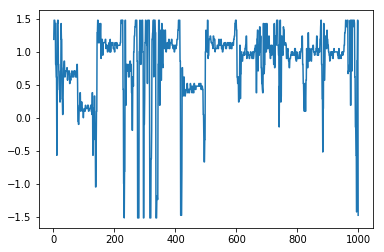

In [10]:
plt.plot(df['x'])
plt.show()

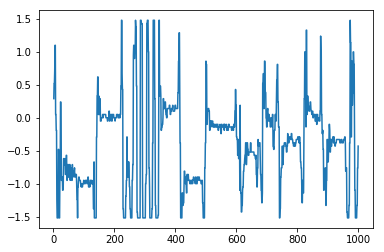

In [11]:
plt.plot(df['y'])
plt.show()

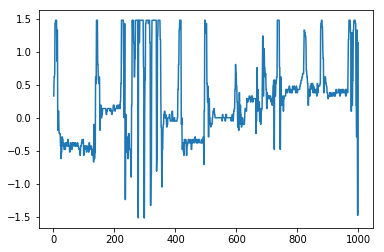

In [12]:
plt.plot(df['z'])
plt.show()

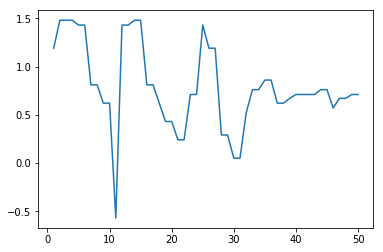

In [13]:
plt.plot(df['x'][:50])
plt.show()

In [14]:
freq = np.fft.fftfreq(df['x'])
plt.plot(freq)
plt.show()

ValueError: n should be an integer

In [15]:
import scipy.fftpack

In [27]:
sigfft = scipy.fftpack.fft(df['y'])
power = np.abs(sigfft)
samplefreq = scipy.fftpack.fftfreq(len(df['y']), d=1/60)

Text(0, 0.5, 'power')

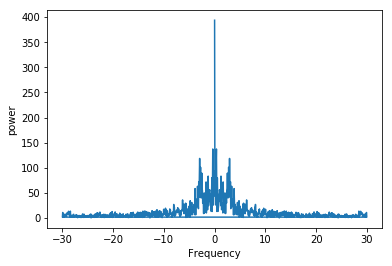

In [28]:
plt.plot(samplefreq, power)
plt.xlabel('Frequency')
plt.ylabel('power')

In [29]:
max(power)

393.71999999999997

In [30]:
pos_mask = np.where(samplefreq > 0)
freqs = samplefreq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]
print(peak_freq)

0.3603603603603604


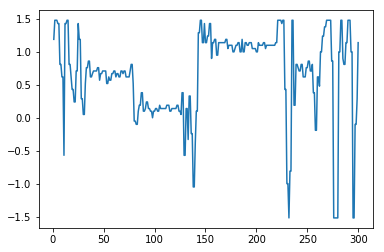

In [33]:
plt.plot(df['x'][:300])

In [34]:
dfr = pd.read_csv('restingSample.csv')
dfr.drop(0)
dfr.head()

,x,y,z
0,0.81,-0.24,0.67
1,0.81,-0.24,0.67
2,0.76,-0.29,0.67
3,0.76,-0.29,0.67
4,0.81,-0.19,0.67


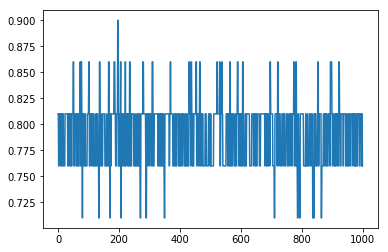

In [38]:
plt.plot(dfr['x'])

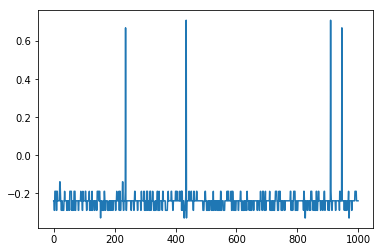

In [39]:
plt.plot(dfr['y'])

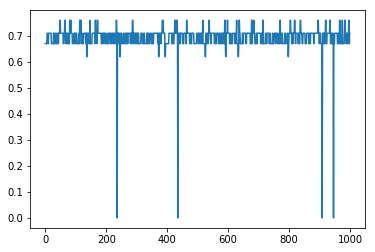

In [40]:
plt.plot(dfr['z'])

Text(0, 0.5, 'power')

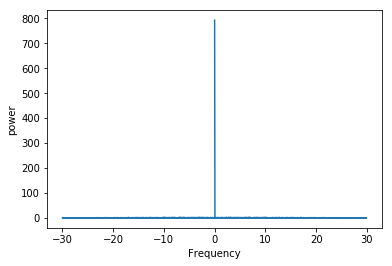

In [41]:
sigfft = scipy.fftpack.fft(dfr['x'])
power = np.abs(sigfft)
samplefreq = scipy.fftpack.fftfreq(len(dfr['x']), d=1/60)
plt.plot(samplefreq, power)
plt.xlabel('Frequency')
plt.ylabel('power')

In [42]:
pos_mask = np.where(samplefreq > 0)
freqs = samplefreq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]
print(peak_freq)

10.02


In [45]:
def vigour(x):
    total = 0
    for vec in x:
        total += np.linalg.norm(vec)
        
    return total / len(x)

In [52]:
def makevectors(x):
    vectors = []
    temp = x.values
    for row in temp:
        vectors.append(row)
    
    return vectors

In [55]:
vigour(makevectors(dfr))

1.0838947044214835

In [56]:
vigour(makevectors(df))

1.3696870290393046

In [57]:
dfa = pd.read_csv('moveOnce.csv')

In [60]:
dfa = dfa.drop(0)

In [61]:
vigour(makevectors(dfa))

1.0898785867434204

In [62]:
dfv = pd.read_csv('veryVigour.csv')

In [63]:
dfv = dfv.drop(0)

In [64]:
vigour(makevectors(dfv))

1.779130232735346

In [65]:
dfp = pd.read_csv('pls.csv')

In [66]:
dfp = dfp.drop(0)

In [67]:
vigour(makevectors(dfp))

2.216333869908957

In [68]:
normal = pd.read_csv('normalShake.csv')
normal = normal.drop(0)

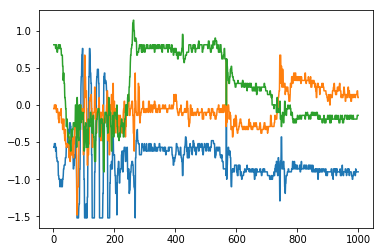

In [69]:
plt.plot(normal['x'])
plt.plot(normal['y'])
plt.plot(normal['z'])

In [70]:
vigour(makevectors(normal))

0.9758484003611795

In [71]:
cool = pd.read_csv('coolShake.csv')
cool = cool.drop(0)

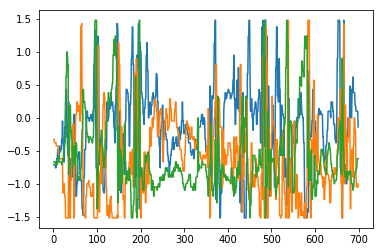

In [72]:
plt.plot(cool['x'])
plt.plot(cool['y'])
plt.plot(cool['z'])

In [73]:
vigour(makevectors(cool))

1.309213444066644

In [74]:
for i in range(len(normal['x'])-40):
    if (np.std(normal['x'][i:i+40]) < 0.05):
        print(i)
        break

280


In [77]:
def complexity(x):
    switch = 0
    for i in range(1, len(x)):
        for j in range(3):
            a, b = x[i-1][j], x[i][j]
            a /= abs(a)
            b /= abs(b)
            if a != b: 
                switch += 1
                
    return switch

In [78]:
complexity(cool.values)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


247

In [79]:
complexity(normal.values)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


172

In [81]:
complexity(dfp.values)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


498

In [82]:
complexity(dfr.values)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


16

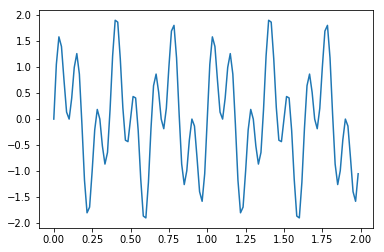

In [87]:
samplingrate = 60
t = np.linspace(0, 2, 2 * samplingrate, endpoint=False)
x = np.sin(8 * 2 * np.pi * t) + np.sin(3 * 2 * np.pi * t)
plt.plot(t, x)

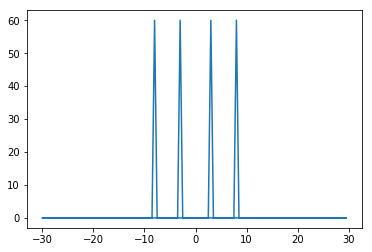

In [88]:
y = scipy.fftpack.fft(x)
freqs = scipy.fftpack.fftfreq(len(x)) * samplingrate
plt.plot(freqs, np.abs(y))

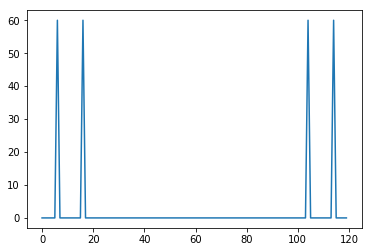

In [89]:
plt.plot(np.abs(y))

In [119]:
from scipy import signal as scipysignal
def fft(signal, hertz):
    x = np.linspace(0, len(signal)/hertz, len(signal), endpoint=False)
    y = scipy.fftpack.fft(scipysignal.detrend(signal))
    freqs = scipy.fftpack.fftfreq(len(x)) * samplingrate
    length = len(freqs) // 2
    plt.plot(freqs[:length], np.abs(y[:length]))

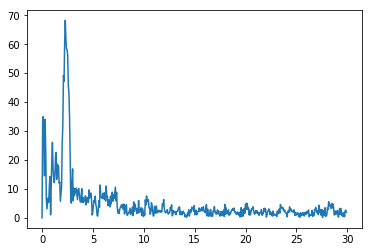

In [120]:
fft(normal['x'], 60)

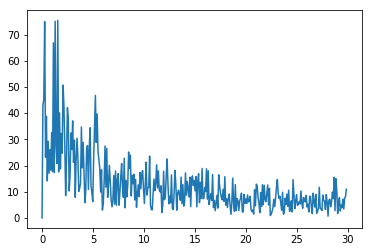

In [121]:
fft(cool['x'], 60)

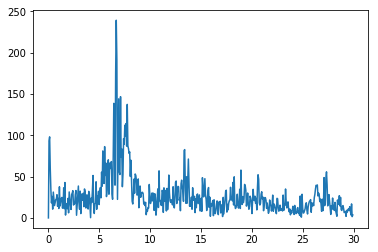

In [122]:
fft(dfp['x'], 60)

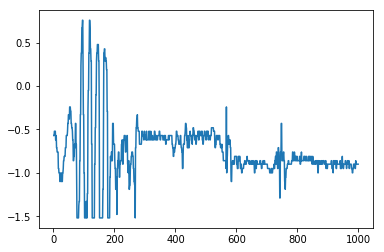

In [124]:
plt.plot(normal['x'])

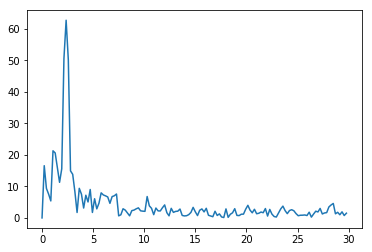

In [126]:
fft(normal['x'][:280], 60)

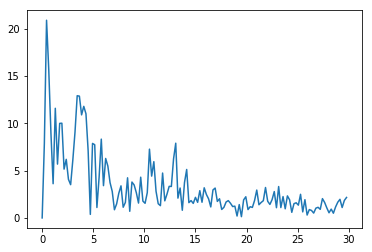

In [127]:
fft(normal['y'][:280], 60)

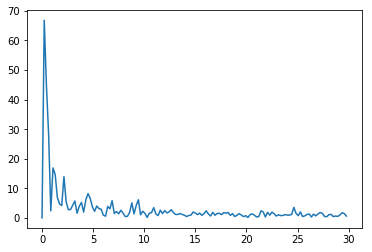

In [128]:
fft(normal['z'][:280], 60)

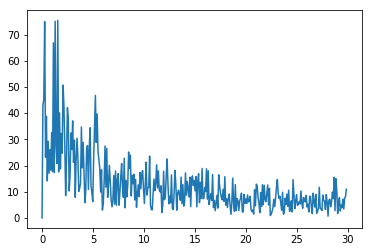

In [130]:
fft(cool['x'], 60)

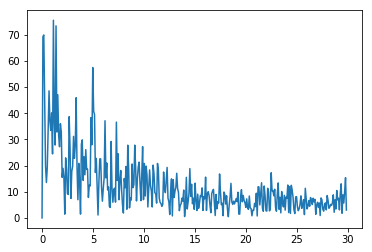

In [131]:
fft(cool['y'], 60)

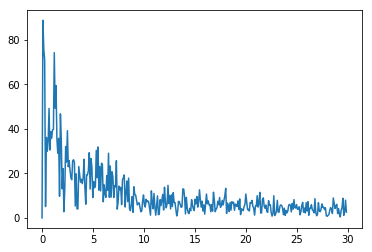

In [132]:
fft(cool['z'], 60)

In [133]:
def fft(signal, hertz):
    x = np.linspace(0, len(signal)/hertz, len(signal), endpoint=False)
    y = scipy.fftpack.fft(scipysignal.detrend(signal))
    freqs = scipy.fftpack.fftfreq(len(x)) * samplingrate
    length = len(freqs) // 2
    return freqs[:length], np.abs(y[:length])

In [135]:
freqs, powers = fft(cool['x'], 60)

In [186]:
def topfreq(freqs, powers, n):
    indices = np.argpartition(powers, -n)[-n:]
    return [[freqs[i], powers[i]] for i in indices]

In [187]:
topfreq(freqs, powers, 10)

[[2.489270386266094, 42.10032019802373],
 [0.08583690987124463, 42.95870599926419],
 [1.1158798283261802, 66.82015271406858],
 [5.236051502145923, 46.7499771815278],
 [2.1459227467811157, 43.059833787934814],
 [1.2875536480686696, 75.0468503723145],
 [2.060085836909871, 50.68810945820739],
 [0.2575107296137339, 74.95820850171269],
 [0.17167381974248927, 45.18442717990048],
 [1.5450643776824033, 75.46188382870838]]

In [194]:
def bucket(freqpower, bins):
    # list of (freq, power)
    buckets = []
    for i in freqpower:
        buckets.append(i)

    buckets = sorted(buckets, key=lambda item: item[0])
        
    while len(buckets) != bins:
        mindiffindex = 0
        mindiff = 9999
        for i in range(len(buckets)-1):
            diff = abs(buckets[i][0] - buckets[i+1][0])
            if (diff < mindiff):
                mindiffindex = i
                mindiff = diff
        
        buckets[mindiffindex][0] = (buckets[mindiffindex][0] * buckets[mindiffindex][1] + buckets[mindiffindex+1][0] * buckets[mindiffindex+1][1]) / (buckets[mindiffindex][0] + buckets[mindiffindex][1])
        buckets[mindiffindex][1] += buckets[mindiffindex+1][1]
        buckets.pop(mindiffindex+1)
        
    return buckets

In [195]:
bucket(topfreq(freqs, powers, 10), 4)

[[3.9007878425539158, 304.9683447672604],
 [1.5450643776824033, 75.46188382870838],
 [4.663661822422337, 135.84826344416592],
 [5.236051502145923, 46.7499771815278]]

In [210]:
def gettopfreq(x):
    freqs, powers = fft(x, 60)
    return bucket(topfreq(freqs, powers, 10), 2)

In [199]:
gettopfreq(cool['x'])

[[3.9007878425539158, 304.9683447672604],
 [1.5450643776824033, 75.46188382870838],
 [4.663661822422337, 135.84826344416592],
 [5.236051502145923, 46.7499771815278]]

In [202]:
shakes = [pd.read_csv('hand%d.csv' % (i)) for i in range(1,4)]

In [211]:
for shake in shakes:
    result = gettopfreq(shake.drop(0)['x'][:250])
    for freq in result:
        print(freq[0])

0.9449089551497796
15.215076189667554
2.3796883116686067
8.75197034100065
2.1394640070228967
11.820715544408575


In [213]:
for shake in shakes:
    freq, powers = fft(shake.drop(0)['x'][:250], 60)
    print(topfreq(freq, powers, 4))

[[2.6399999999999997, 14.986382621403063], [1.92, 37.33846368249419], [2.4, 44.11718447209277], [2.16, 68.08899497473368]]
[[1.44, 16.316919983553312], [1.68, 23.922801229923003], [2.16, 39.63439121817686], [1.92, 67.45275724110569]]
[[1.44, 16.494515429721336], [1.68, 22.65557647361256], [2.16, 46.04457159864161], [1.92, 57.69383497965058]]


In [228]:
for shake in shakes:
    freq, powers = fft(shake.drop(0)['x'][:250], 60)
    tops = topfreq(freq, powers, 8)
    out = list(set([round(top[0] * 4)/4 for top in tops]))
    out.sort()
    print(out)
        

[0.25, 0.5, 1.5, 2.0, 2.25, 2.5, 2.75, 6.75]
[0.5, 0.75, 1.5, 1.75, 2.0, 2.25, 2.5, 4.0]
[0.25, 0.5, 1.5, 1.75, 2.0, 2.25, 2.75, 4.0]


In [229]:
freq, powers = fft(cool['x'], 60)
tops = topfreq(freq, powers, 8)
out = list(set([round(top[0]*4)/4 for top in tops]))
out.sort()
print(out)

[0.25, 1.0, 1.25, 1.5, 2.0, 2.25, 5.25]
